In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 📌 Load Dataset
df = pd.read_csv("train.csv")

In [3]:
print(df.head())
print("Dataset Shape:", df.shape)

   id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0              0              0              1              0  ...   
1              0              0              0              1  ...   
2              0              0              0              1  ...   
3              0              1              0              0  ...   
4              0              1              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1 

In [4]:
# 📌 Target & Features
target = "target"  # 🔴 Update if target column name different in your dataset
X = df.drop(columns=[target])
y = df[target]

In [5]:
# 📌 Separate Numeric & Categorical Data
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [6]:
# 📌 Preprocessing steps
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)

In [7]:
# 📌 Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# 📌 Model - Random Forest (best choice per dataset type)
model = Pipeline(steps=[
    ("preprocessing", preprocess),
    ("rf", RandomForestClassifier(n_estimators=200, random_state=42))
])

In [9]:
# 📌 Train Model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind...
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index([], dtype='object'))])),
                ('rf',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

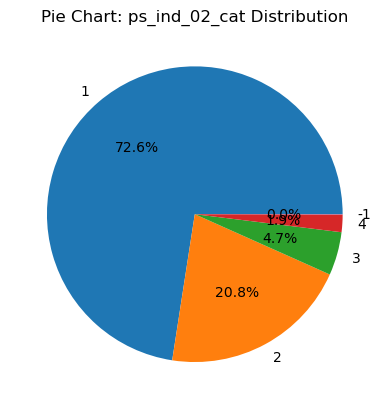

In [38]:
# Using a categorical column: ps_ind_02_cat
plt.figure()
df['ps_ind_02_cat'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Pie Chart: ps_ind_02_cat Distribution")
plt.ylabel("")
plt.show()

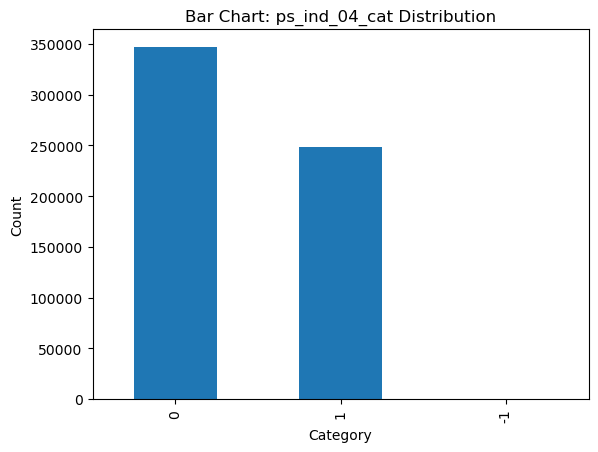

In [11]:
plt.figure()
df['ps_ind_04_cat'].value_counts().plot(kind='bar')
plt.title("Bar Chart: ps_ind_04_cat Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

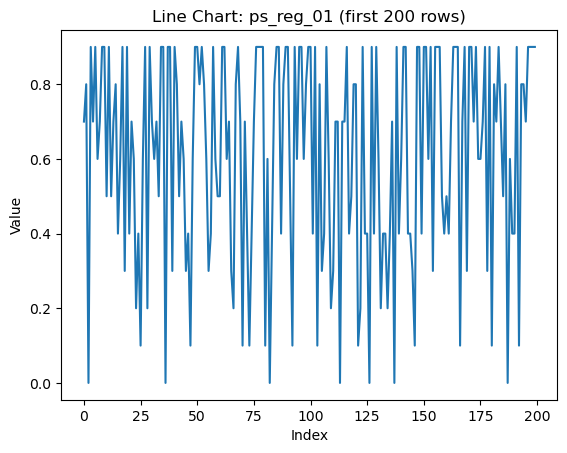

In [12]:
# Using a numeric column: ps_reg_01
plt.figure()
plt.plot(df['ps_reg_01'].head(200))  # First 200 points for readability
plt.title("Line Chart: ps_reg_01 (first 200 rows)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

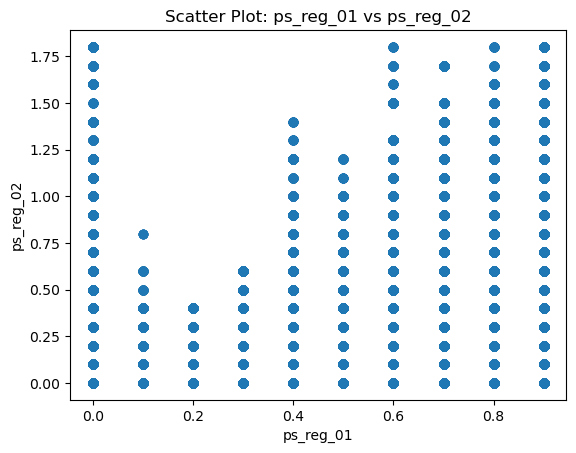

In [13]:
plt.figure()
plt.scatter(df['ps_reg_01'], df['ps_reg_02'])
plt.title("Scatter Plot: ps_reg_01 vs ps_reg_02")
plt.xlabel("ps_reg_01")
plt.ylabel("ps_reg_02")
plt.show()

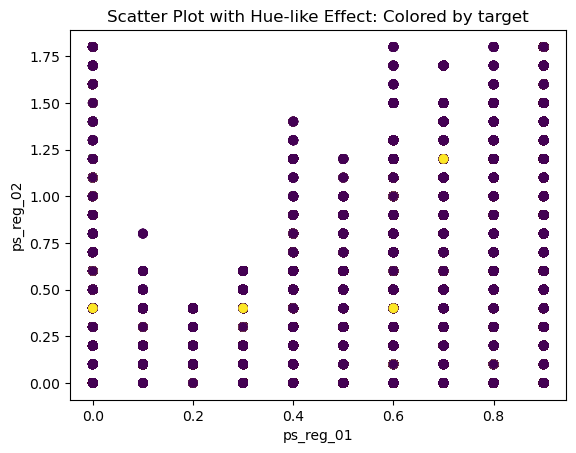

In [14]:
# (Matplotlib automatically assigns colors using default colormap)
plt.figure()
plt.scatter(df['ps_reg_01'], df['ps_reg_02'], c=df['target'])
plt.title("Scatter Plot with Hue-like Effect: Colored by target")
plt.xlabel("ps_reg_01")
plt.ylabel("ps_reg_02")
plt.show()

In [15]:
target = "target"   # Change if needed
X = df.drop(columns=[target])
y = df[target]

In [16]:
# ----------- DOWN SAMPLE (fix memory problem) ------------
X, _, y, _ = train_test_split(X, y, test_size=0.80, random_state=42)

print("Training on reduced dataset:", X.shape)

Training on reduced dataset: (119042, 58)


In [17]:
# ---------------- Missing Values -----------------
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X)

In [18]:
# ---------------- Train-Test Split -----------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [19]:
# ---------------- 4 Models -----------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=120),
    "XGBoost": XGBClassifier(eval_metric="logloss", tree_method="hist")
}

results = {}

print("\n=========== MODEL RESULTS ===========")
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    results[name] = (acc, f1, pred)

    print(f"\n{name}")
    print("Accuracy:", round(acc, 4))
    print("F1 Score:", round(f1, 4))


=========== MODEL RESULTS ===========

Logistic Regression
Accuracy: 0.963
F1 Score: 0.0

Decision Tree
Accuracy: 0.9197
F1 Score: 0.0628

Random Forest
Accuracy: 0.9629
F1 Score: 0.0

XGBoost
Accuracy: 0.9626
F1 Score: 0.0022


In [20]:
# ---------------- Best Model -----------------
best_model_name = max(results, key=lambda x: results[x][0])
best_acc = results[best_model_name][0]
best_pred = results[best_model_name][2]

print("\n======================================")
print(f"🏆 Best Model: {best_model_name} (Accuracy: {best_acc:.4f})")
print("======================================")

# ---------------- Show Accurate Predictions -----------------
print("\nActual vs Predicted (first 20 rows):\n")
comparison = pd.DataFrame({
    "Actual": y_test[:20].values,
    "Predicted": best_pred[:20]
})
print(comparison)


🏆 Best Model: Logistic Regression (Accuracy: 0.9630)

Actual vs Predicted (first 20 rows):

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0



========= CONFUSION MATRICES =========



<Figure size 640x480 with 0 Axes>

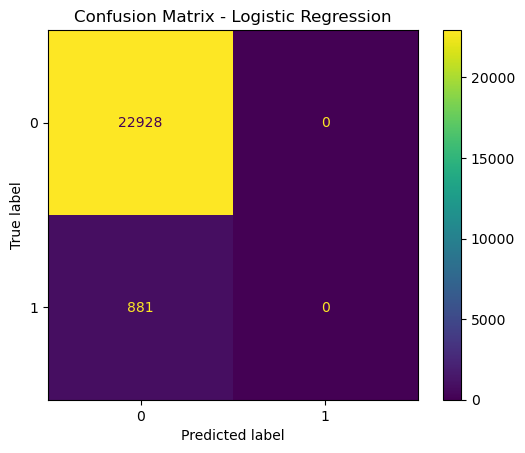

<Figure size 640x480 with 0 Axes>

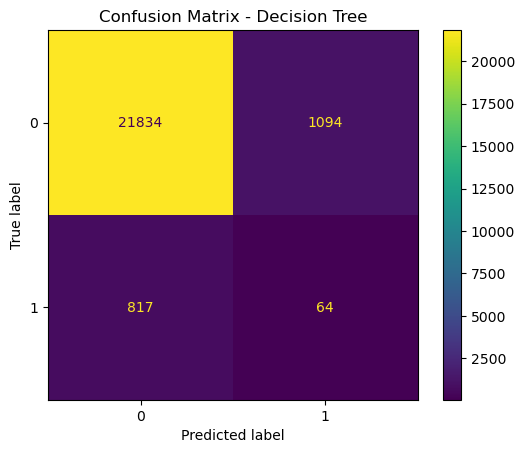

<Figure size 640x480 with 0 Axes>

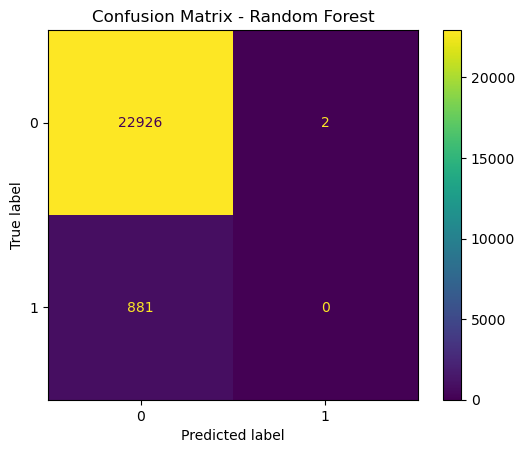

<Figure size 640x480 with 0 Axes>

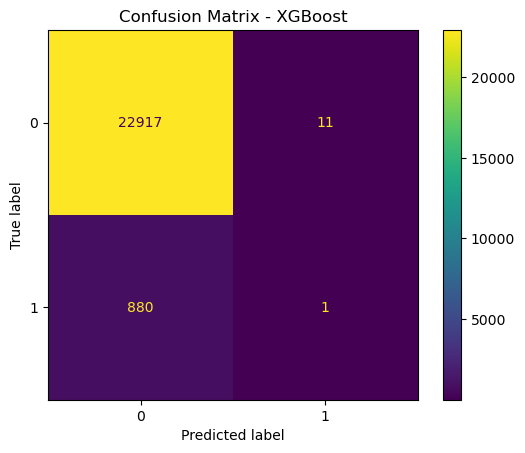

In [21]:
print("\n========= CONFUSION MATRICES =========\n")

for name, (acc, f1, pred) in results.items():
    cm = confusion_matrix(y_test, pred)
    plt.figure()
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [22]:
# Extract metrics
model_names = list(results.keys())
accuracies = [results[m][0] for m in model_names]
f1_scores = [results[m][1] for m in model_names]

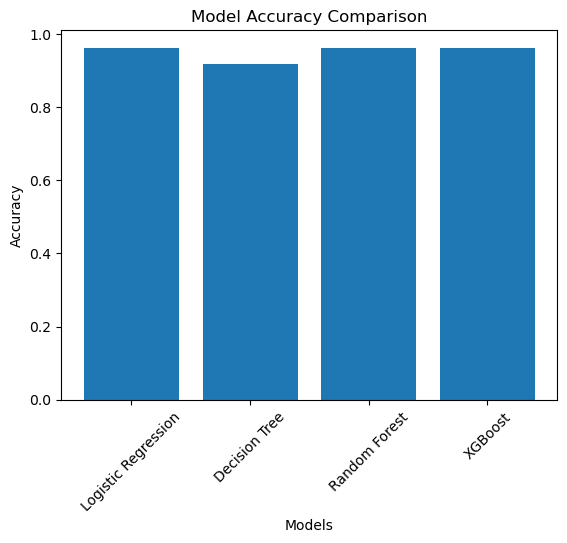

In [23]:
# ----------- Accuracy Bar Chart ------------
plt.figure()
plt.bar(model_names, accuracies)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


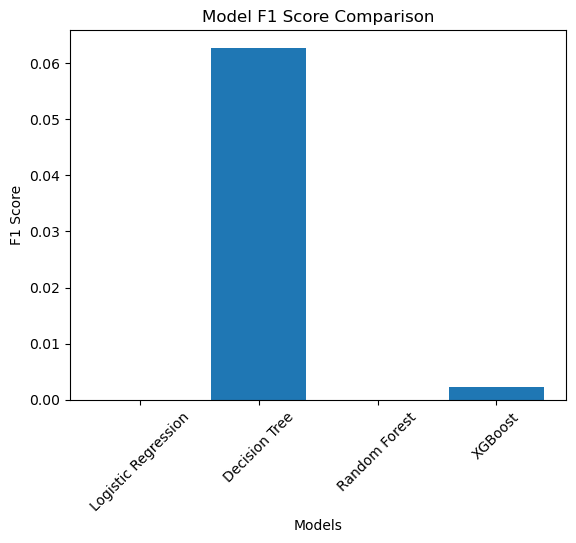

In [24]:
# ----------- F1 Score Bar Chart ------------
plt.figure()
plt.bar(model_names, f1_scores)
plt.title("Model F1 Score Comparison")
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.show()

In [25]:
# 📌 Predict
y_pred = model.predict(X_test)


In [26]:
# 📌 Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [27]:
print("\n===== Evaluation Results =====")


===== Evaluation Results =====


In [28]:
print("Accuracy      :", round(accuracy, 4))

Accuracy      : 0.9626


In [29]:
print("F1 Score      :", round(f1, 4))

F1 Score      : 0.9447


In [30]:
print("RMSE          :", round(rmse, 4))

RMSE          : 0.1934


In [31]:
print("R² Score      :", round(r2, 4))

R² Score      : -0.0502


In [32]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     22928
           1       0.08      0.00      0.00       881

    accuracy                           0.96     23809
   macro avg       0.52      0.50      0.49     23809
weighted avg       0.93      0.96      0.94     23809

